# Credit Card Fraud Detection

### Goal

Train a model to predict fraudulent credit card transactions

### Tasks
1. Load [data from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud/downloads/creditcardfraud.zip) and do exploratory data analysis to understand our data
2. Clean data and prepare it in X (2-d array), y (1-d array) format for modeling
3. Select algorithm and train model
4. Evaluate model
5. Tune/improve model
6. Use model to predict fraudulent transactions

### Approach
1. Sample the data so as to reduce the skew
2. Start with a logistic regression classifier
3. Perform classifications model using other classification algorithms.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imblearn

%matplotlib inline
pd.options.display.max_columns = 40

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Load data

In [3]:
df = pd.read_csv('./data/creditcard.csv')

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Exploratory data analysis

In [23]:
pd.value_counts(df['Class'])

0    284315
1       492
Name: Class, dtype: int64

In [24]:
non_fraud_percentage = (284315-492)/284315.0
print(non_fraud_percentage)

0.998269524998681


We have a highly unbalanced dataset, and this will make it hard to train our model to detect fraud.
If we wrote a function to always predict 0 (y=not_fraud), we would be correct **99.8%** of the time, but would not have detected any of the fraud cases.

To deal with this, we have 3 options:
1. **Weighting**: Assign the under-represented class a higher weight. However, this is unlikely to be effective given the significant skew in the dataset.
2. **Thresholding**: Override the model's `.predict()` method to classify something as 0 or 1 based on a probability threshold (e.g. 0.90), rather than the probability with the higher value (e.g. 0.50001)
3. **Sampling**: For each training set, sample it in such a way that the instances of 0 and 1 are roughly equal

[Read more](https://stackoverflow.com/questions/26221312/dealing-with-the-class-imbalance-in-binary-classification/26244744#26244744)

### Preparing our data for modeling

In [4]:
X = df.ix[:, df.columns != 'Class']
y = df.ix[:, df.columns == 'Class'].values.ravel()

[`.ravel()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html) is a method that helps us convert y (which is originally a column-vector) to a 1-dimensional array, so that scikit-learn won't throw a DataConversionWarning. The code will work without transforming it with `.values.ravel()` as well, but we'll have a warning message, which is not so nice. 

In [5]:
### Split our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

## Iteration 1: Logistic regression model with no sampling or thresholding

### Train our model

In [27]:
model_1 = LogisticRegression()

In [28]:
model_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Evaluate our model

In [29]:
# 1. .score()
train_score_1 = model_1.score(X_train, y_train)
test_score_1 = model_1.score(X_test, y_test)

print("training set score: %f" % train_score_1)
print("test set score:     %f" % test_score_1)

training set score: 0.999078
test set score:     0.999087


In [30]:
expected_1 = y
predicted_1 = model_1.predict(X)

In [31]:
# 2. .confusion_matrix()
print(metrics.confusion_matrix(expected_1, predicted_1))

[[284237     78]
 [   184    308]]


Looking at the 2nd nested array (`[false_positives, true_positives]`), we see that we've correctly predicted **322** fraudulent transactions, and we've misclassified **170** fraudulent transactions as non-fraudulent.

In [32]:
# 3. .classification_report()
print(metrics.classification_report(expected_1, predicted_1))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.80      0.63      0.70       492

avg / total       1.00      1.00      1.00    284807



Looking at the precision score, we can see that **74% of our predictions of y=1 (fraud) were were**.

Looking at the recall score, we can see that only **65% of the fraudulent cases in reality were correctly classified**.

Note: remember our helpful mnemonic:
- **pre**cision: a measure of our accuracy with our **pre**dictions as the baseline
- **re**call: a measure of our accuracy with the **re**ality as the baseline

## Iteration 2 (Logistic regression model with sampling)

To improve the accuracy of the model, we can undersample the data such that the proportion of cases of y=0 and y=1 are 50-50, instead of 99.8-0.2.

**`imblearn`** (imbalanced_learn) is a nice library that has methods for doing this undersampling

In [33]:
from imblearn.under_sampling import RandomUnderSampler

import collections

In [34]:
rus = RandomUnderSampler(return_indices=True)
X_undersampled, y_undersampled, idx_resampled = rus.fit_sample(X, y)
print('length of X and y:', len(X_undersampled), len(y_undersampled))
print('Count of y values:', collections.Counter(y_undersampled))

length of X and y: 984 984
Count of y values: Counter({1: 492, 0: 492})


In [69]:
X_train_undersampled_25_percent_split, X_test_undersampled_25_percent_split, y_train_undersampled_25_percent_split,\
    y_test_undersampled_25_percent_split = train_test_split(X_undersampled, y_undersampled, random_state=0)

In [70]:
model_2 = LogisticRegression()
model_2.fit(X_train_undersampled_25_percent_split, y_train_undersampled_25_percent_split)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
expected = y_undersampled
predicted = model_2.predict(X_undersampled)

print(metrics.confusion_matrix(expected, predicted))
print(metrics.classification_report(expected, predicted))

[[477  15]
 [ 39 453]]
             precision    recall  f1-score   support

          0       0.92      0.97      0.95       492
          1       0.97      0.92      0.94       492

avg / total       0.95      0.95      0.95       984



## Iteration 3 (Logistic regression model with GridSearchCV)

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
logistic_regression_model = LogisticRegression()

param_grid = {'C': [0.01, 0.1, 1, 10],
              'class_weight': [{
                  0: 1, 
                  1: 2
              },
              {
                  0: 1, 
                  1: 1.2
              },
              {
                  0: 1, 
                  1: 1.4
              }
              ]}

model_3 = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, cv=5)
model_3.fit(X_train, y_train)

print("Best estimator:", model_3.best_estimator_)
print("Best score:", model_3.best_score_)

Best estimator: LogisticRegression(C=0.1, class_weight={0: 1, 1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Best score: 0.999180730788


In [44]:
expected_3 = y
predicted_3 = model_3.predict(X)

print(metrics.confusion_matrix(expected_3, predicted_3))
print(metrics.classification_report(expected_3, predicted_3))

[[284255     60]
 [   124    368]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.86      0.75      0.80       492

avg / total       1.00      1.00      1.00    284807



### Iteration 4: (Logistic regression model with undersampling and GridSearchCV)

In [75]:
logistic_regression_model = LogisticRegression()

param_grid = {'C': [0.01, 0.1, 1, 10],
              'class_weight': [{
                  0: 1, 
                  1: 2
              },
              {
                  0: 1, 
                  1: 1.2
              },
              {
                  0: 1, 
                  1: 1.4
              }]}

model_4 = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, cv=5)
model_4.fit(X_train_undersampled_25_percent_split, y_train_undersampled_25_percent_split)

print("Best estimator:", model_4.best_estimator_)
print("Best score:", model_4.best_score_)

Best estimator: LogisticRegression(C=0.1, class_weight={0: 1, 1: 1.4}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Best score: 0.937669376694


In [76]:
expected_4 = y
predicted_4 = model_4.predict(X)

print(metrics.confusion_matrix(expected_4, predicted_4))
print(metrics.classification_report(expected_4, predicted_4))

[[275363   8952]
 [    55    437]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98    284315
          1       0.05      0.89      0.09       492

avg / total       1.00      0.97      0.98    284807



### Iteration 5: Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
model_5 = RandomForestClassifier()
model_5.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [8]:
expected_5 = y
predicted_5 = model_5.predict(X)

print(metrics.confusion_matrix(expected_5, predicted_5))
print(metrics.classification_report(expected_5, predicted_5))

[[284310      5]
 [    46    446]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.99      0.91      0.95       492

avg / total       1.00      1.00      1.00    284807



In [9]:
model_5.feature_importances_

array([ 0.01051503,  0.01315391,  0.0093916 ,  0.01412618,  0.03471292,
        0.01020134,  0.01295551,  0.02506841,  0.01235664,  0.02527668,
        0.0853672 ,  0.11987168,  0.14544408,  0.00936543,  0.1150287 ,
        0.01372437,  0.08678474,  0.0987931 ,  0.04612033,  0.01017366,
        0.01341121,  0.00994655,  0.00826253,  0.00811489,  0.00666897,
        0.01155721,  0.01254294,  0.01446959,  0.00900062,  0.00759398])

In [11]:
?plt.xticks

([<matplotlib.axis.XTick at 0x119c78f98>,
 <a list of 32 Text xticklabel objects>)

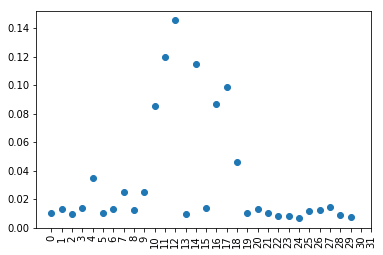

In [18]:
plt.plot(model_5.feature_importances_, 'o')
plt.xticks(range(32), df.index, rotation=90)

### Iteration 6: Random Forest (with undersampling)

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
model_6 = RandomForestClassifier()
model_6.fit(X_train_undersampled_25_percent_split, y_train_undersampled_25_percent_split)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [78]:
expected_6 = y
predicted_6 = model_6.predict(X)

print(metrics.confusion_matrix(expected_6, predicted_6))
print(metrics.classification_report(expected_6, predicted_6))

[[276452   7863]
 [    14    478]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.99    284315
          1       0.06      0.97      0.11       492

avg / total       1.00      0.97      0.98    284807



### Iteration 7: Random Forest (with undersampling, and 40% train_test_split ratio)

To ensure that we're not overfitting, let's try it with 40% train_test_split ratio (i.e. 40% of the data will be held off for testing/validating), instead of the default ratio of 25%

In [84]:
X_train_undersampled_40_percent_split, X_test_undersampled_40_percent_split, y_train_undersampled_40_percent_split,\
    y_test_undersampled_40_percent_split = train_test_split(X_undersampled,
                                                            y_undersampled,
                                                            test_size=0.4,
                                                            random_state=0)

In [80]:
model_7 = RandomForestClassifier()
model_7.fit(X_train_undersampled_40_percent_split, y_train_undersampled_40_percent_split)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [81]:
print(metrics.confusion_matrix(expected_7, predicted_7))
print(metrics.classification_report(expected_7, predicted_7))

[[284310      5]
 [    54    438]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.99      0.89      0.94       492

avg / total       1.00      1.00      1.00    284807



We see that our recall score has dropped from 0.97 to **0.89**, which confirms our suspicion that our earlier score of 0.97 was due to overfitting! 😢😢

In [99]:
# TO DELETE
# results based on training with 0.4 train_test_split ratio (i.e. 40% of data is reserved for testing)
print(metrics.confusion_matrix(expected_7, predicted_7))
print(metrics.classification_report(expected_7, predicted_7))

[[275332   8983]
 [    23    469]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98    284315
          1       0.05      0.95      0.09       492

avg / total       1.00      0.97      0.98    284807



### Iteration 8: Random Forest (with undersampling, and 40% train_test_split ratio, and optimization with GridSearchCV)

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
random_forest_classifier_model = RandomForestClassifier()

To know which params we can tune, you can use the `.get_params` property. As for what values to put in, this will require some reading and general googling :-)

Generally, random forests are tuned by tweaking the following hyperparameters:
- max_features
- n_estimators
- min_samples_leaf
- class_weight

In [66]:
random_forest_classifier_model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)>

In [85]:
random_forest_classifier_model = RandomForestClassifier()

param_grid = {'max_features': [None, 'auto', 'sqrt', 'log2'],
              'n_estimators': [1, 2, 4, 8, 10, 20, 30, 50],
              'min_samples_leaf': [1,5,10,50],
              'class_weight': [{
                  0: 1, 
                  1: 1
              },
              {
                  0: 1, 
                  1: 1.5
              },
              {
                  0: 1, 
                  1: 2
              },
              {
                  0: 1, 
                  1: 2.5
              }
              ]}

model_8 = GridSearchCV(estimator=random_forest_classifier_model, 
                       param_grid=param_grid, cv=5)
model_8.fit(X_train_undersampled_40_percent_split, y_train_undersampled_40_percent_split)

print("Best estimator:", model_8.best_estimator_)
print("Best score:", model_8.best_score_)

Best estimator: RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 2},
            criterion='gini', max_depth=None, max_features='log2',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Best score: 0.942372881356


In [87]:
expected_8 = y
predicted_8 = model_8.predict(X)

print(metrics.confusion_matrix(expected_8, predicted_8))
print(metrics.classification_report(expected_8, predicted_8))

[[277980   6335]
 [    20    472]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99    284315
          1       0.07      0.96      0.13       492

avg / total       1.00      0.98      0.99    284807



### Conclusion:
1. LogisticRegression models are a great starting point for building classification models
2. RandomForestClassifier models performs better than LogisticRegression out of the box, without any tuning/optimisation
3. RandomForestClassifier models outperform LogisticRegression models when tuned
4. Undersampling is a useful technique for training models with highly skewed data